Tianjian Ni 

Computer Vision Assignment 1


# Question 1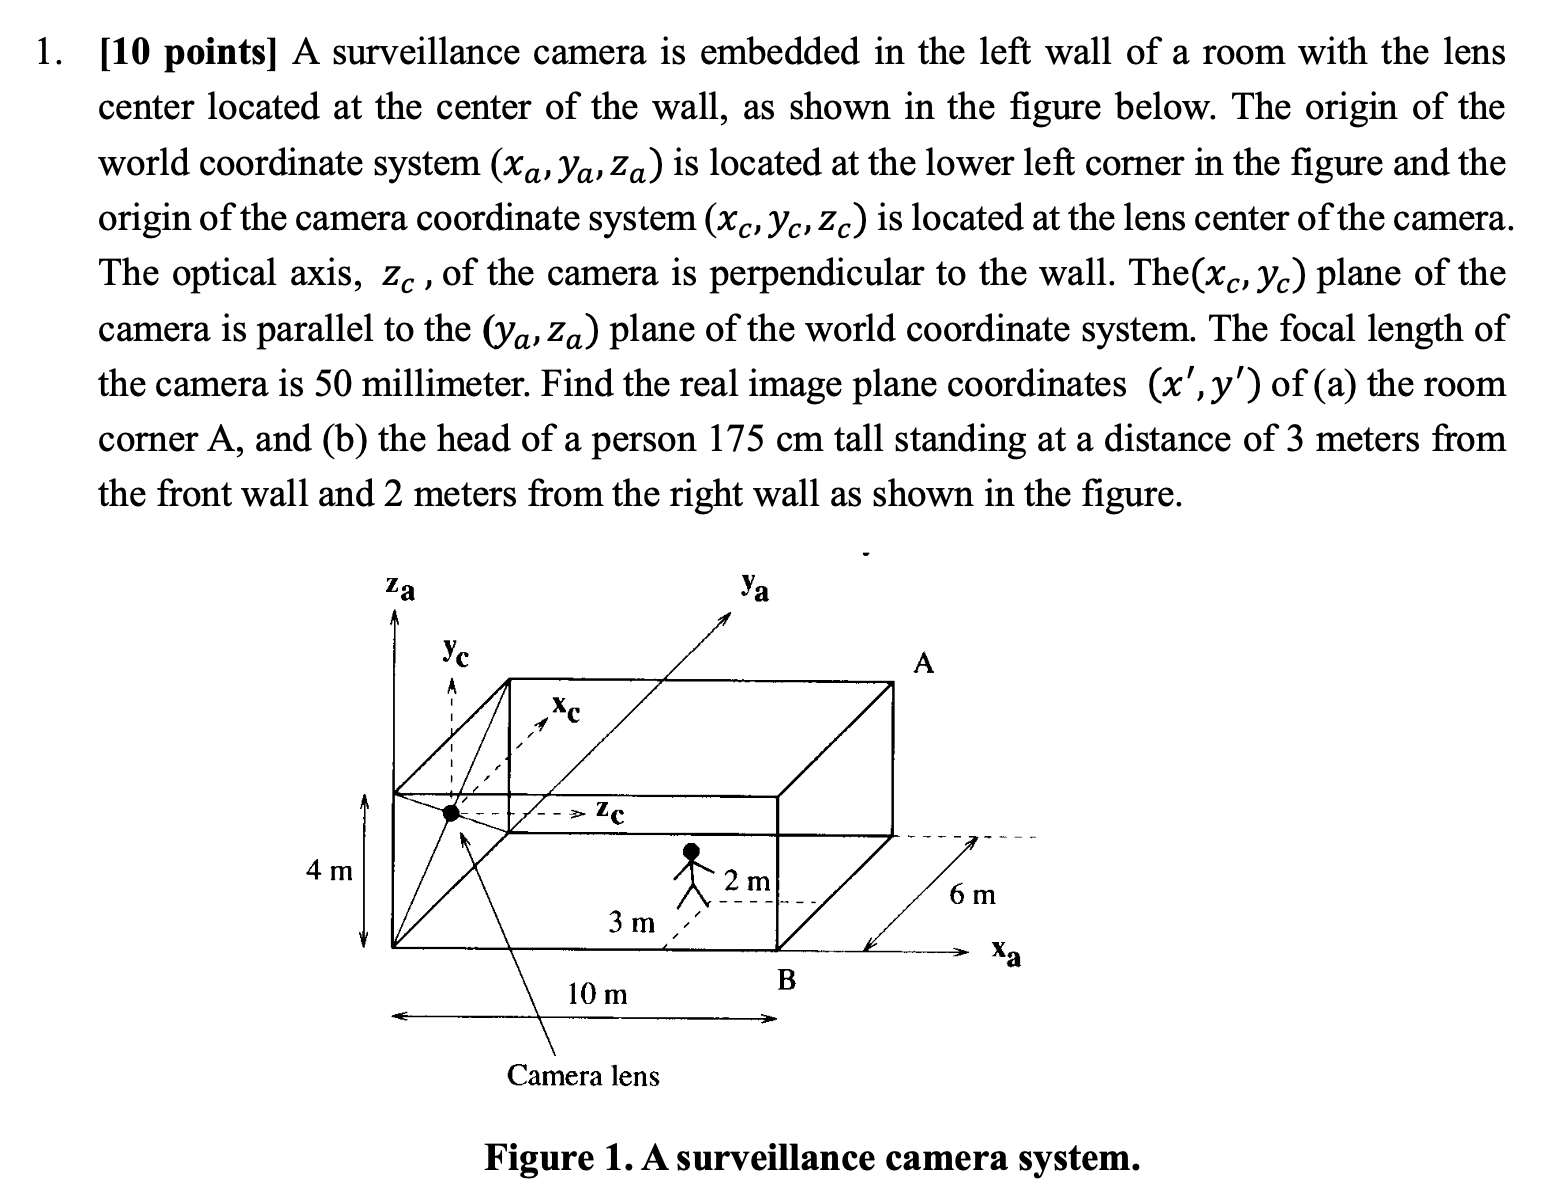

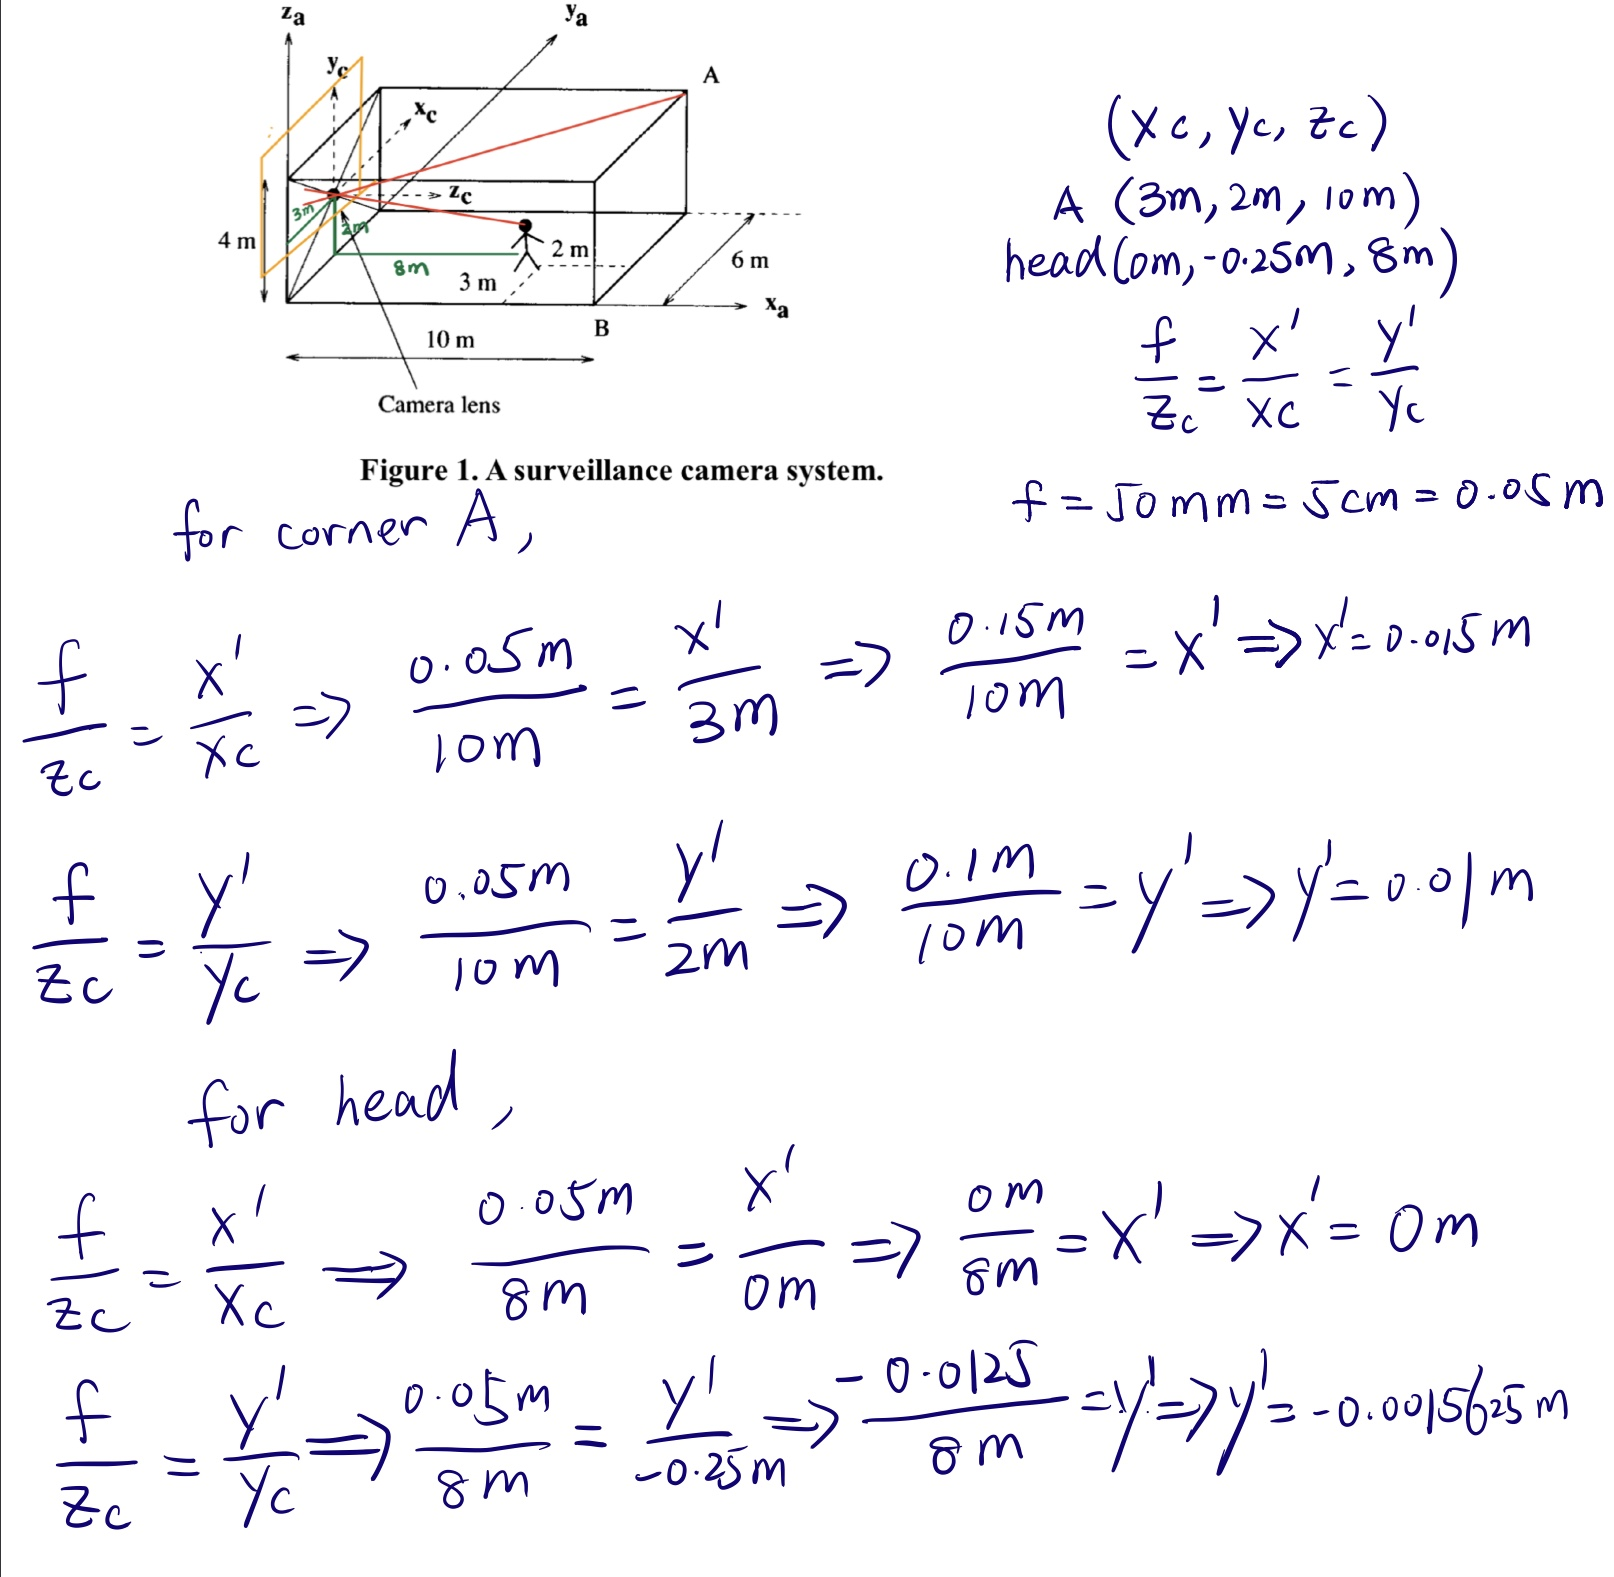

In [1]:
import cv2 
import numpy as np

# Question 2
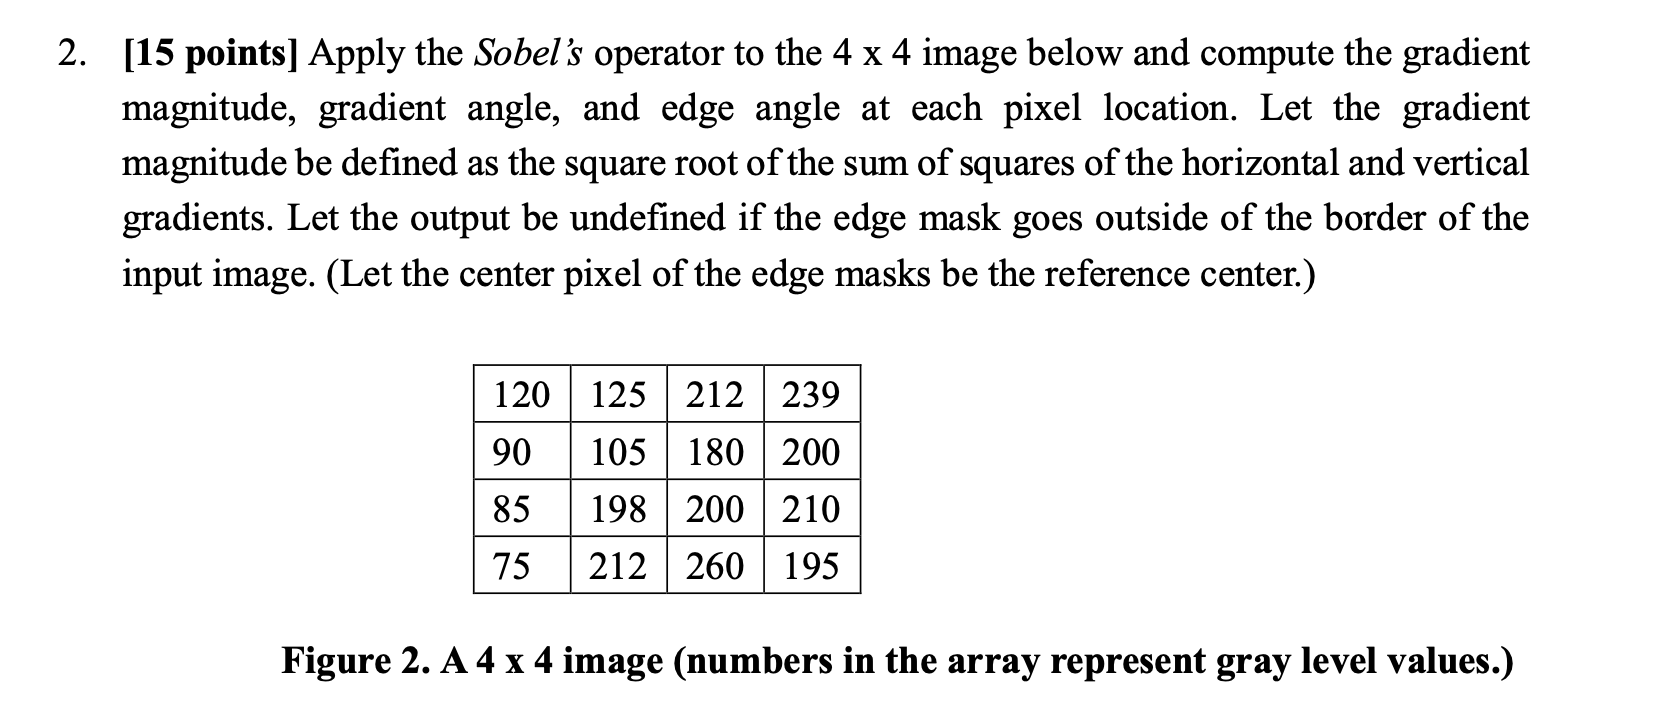

In [2]:
# 2D Convolution, assuming padding = 0
def convolution_2D(image, kernel):
  # size of the input image
  image_size_i = int(image.shape[0])
  image_size_j = int(image.shape[1])

  # size of the kernel 
  kernel_size_i = int(kernel.shape[0])
  kernel_size_j = int(kernel.shape[1])

  # sizes of the output image
  output_size_i = image_size_i - kernel_size_i + 1
  output_size_j = image_size_j - kernel_size_j + 1
  output = np.zeros((output_size_i, output_size_j))

  # compute each output image's pixel through computing convolution
  for i in range(image_size_i):
    for j in range(image_size_j):
      if i > image_size_i - kernel_size_i or j > image_size_j - kernel_size_j:
        continue
      else:
        output[i,j] = (kernel * image[i: i + kernel_size_i, j: j + kernel_size_j]).sum()
  return output

In [3]:
# Use convolution_2D to calculate Gx, Gy, gradient magnitude, gradient angle, and edge angle of the Sobel Operator
def Sobel_Operator(image):
  Gx_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  Gy_kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  Gx = convolution_2D(image, Gx_kernel)
  Gy = convolution_2D(image, Gy_kernel)
  print("Gx matrix is \n", Gx)
  print("Gy matrix is \n", Gy)
  gradient_magnitude = np.sqrt(np.power(Gx, 2) + np.power(Gy, 2))
  print("Gradient magnitude matrix is \n", gradient_magnitude)
  gradient_angle = np.rad2deg(np.arctan2(Gy, Gx)) + 360
  print("Gradient angle matrix is (degrees)\n", gradient_angle)
  edge_angle = gradient_angle + 90 - 360
  print("Edge Angle matrix is (degrees)\n", edge_angle)

In [4]:
# Test on the Sobel Operator
image = np.array([[120,125,212,239],[90,105,180,200],[85,198,200,210],[75,212,260,195]])
Sobel_Operator(image)

Gx matrix is 
 [[387. 316.]
 [505. 102.]]
Gy matrix is 
 [[ -99.  -20.]
 [-279. -262.]]
Gradient magnitude matrix is 
 [[399.46213838 316.63227883]
 [576.9454047  281.15476165]]
Gradient angle matrix is (degrees)
 [[345.65066796 356.3785153 ]
 [331.08043621 291.27160892]]
Edge Angle matrix is (degrees)
 [[75.65066796 86.3785153 ]
 [61.08043621 21.27160892]]


Solution to Question 2

Gradient magnitude matrix is 

 [399.46213838 316.63227883]

 [576.9454047  281.15476165] 

Gradient angle matrix is (degrees)

 [345.65066796 356.3785153 ]
 
 [331.08043621 291.27160892]

Edge Angle matrix is (degrees)
 
 [75.65066796 86.3785153 ]

 [61.08043621 21.27160892] 

 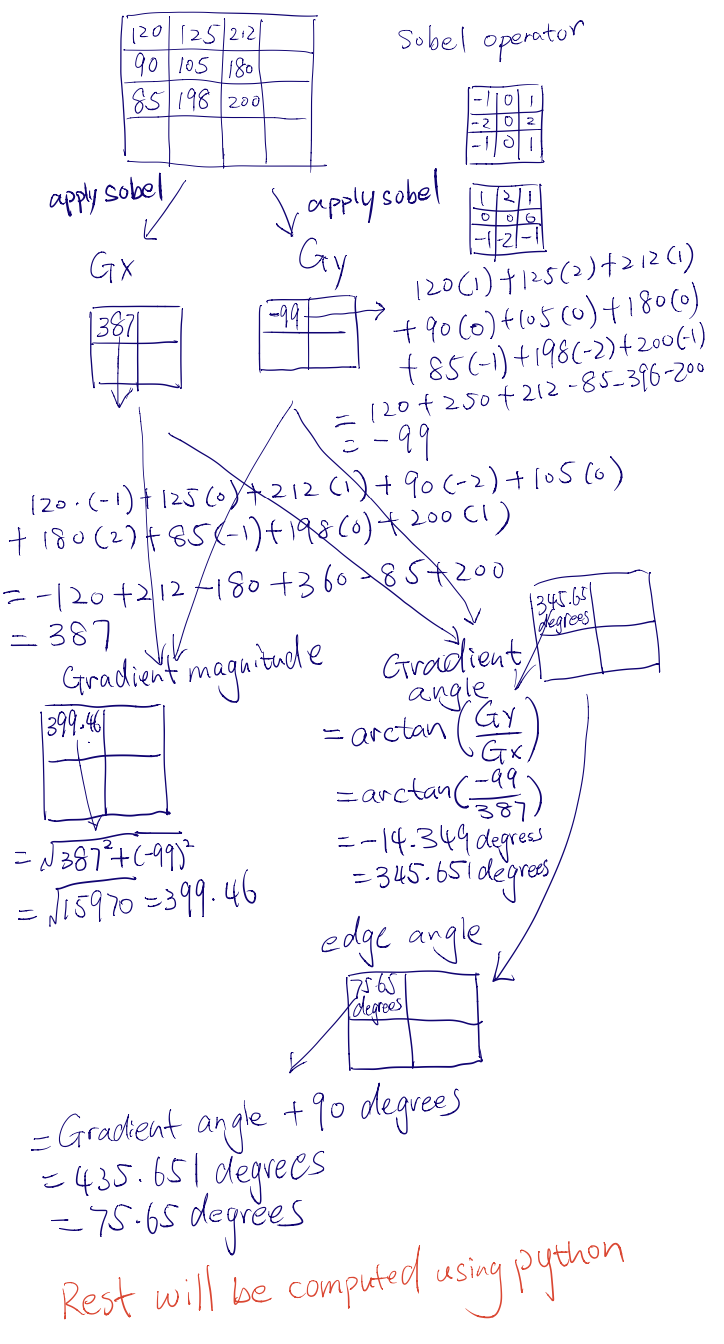

# Question 3
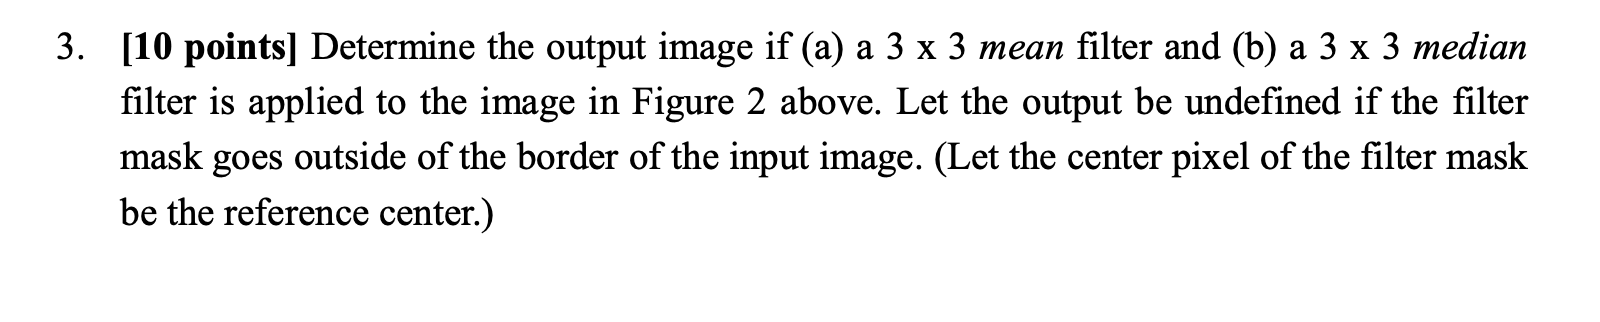

In [5]:
# Funtion to apply mean filter to an image
def Mean_Filter(image, kernal_length = 3):
  mean_filter_kernel = np.ones((kernal_length, kernal_length)) / (kernal_length * kernal_length)
  print("Mean filter kernel of ", kernal_length, " X ", kernal_length, " is \n", mean_filter_kernel)
  output = convolution_2D(image, mean_filter_kernel)
  return output

In [6]:
# Test on the mean filter
image = np.array([[120,125,212,239],[90,105,180,200],[85,198,200,210],[75,212,260,195]])
print("Mean filter matrix is \n", Mean_Filter(image))

Mean filter kernel of  3  X  3  is 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Mean filter matrix is 
 [[146.11111111 185.44444444]
 [156.11111111 195.55555556]]


In [7]:
# Funtion to apply median filter to an image
def Median_Filter(image, kernal_length = 3):
  # size of the input image
  image_size_i = int(image.shape[0])
  image_size_j = int(image.shape[1])

  # size of the kernel 
  kernel_size_i = kernal_length
  kernel_size_j = kernal_length

  # sizes of the output image
  output_size_i = image_size_i - kernel_size_i + 1
  output_size_j = image_size_j - kernel_size_j + 1
  output = np.zeros((output_size_i, output_size_j))

  # compute each output image's pixel through finding median of the image area
  for i in range(image_size_i):
    for j in range(image_size_j):
      if i > image_size_i - kernel_size_i or j > image_size_j - kernel_size_j:
        continue
      else:
        output[i,j] = np.median(image[i: i + kernel_size_i, j: j + kernel_size_j])
  return output

In [8]:
# Test on the median filter
image = np.array([[120,125,212,239],[90,105,180,200],[85,198,200,210],[75,212,260,195]])
print("Median filter matrix is \n", Median_Filter(image))

Median filter matrix is 
 [[125. 200.]
 [180. 200.]]


Solution to Question 3

Mean filter matrix is 

 [146.11111111 185.44444444]

 [156.11111111 195.55555556]

 Median filter matrix is 

 [125. 200.]

 [180. 200.]
 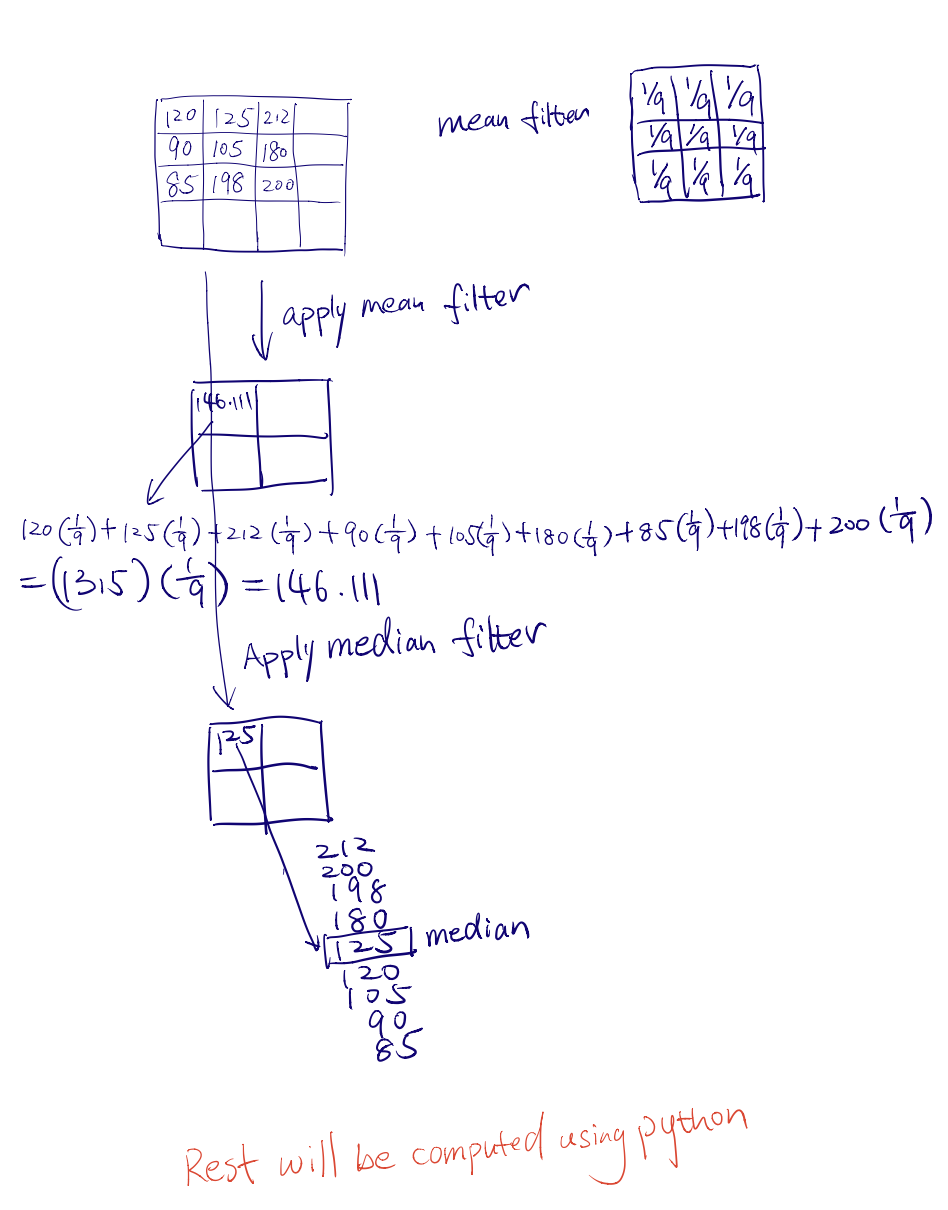

# Question 4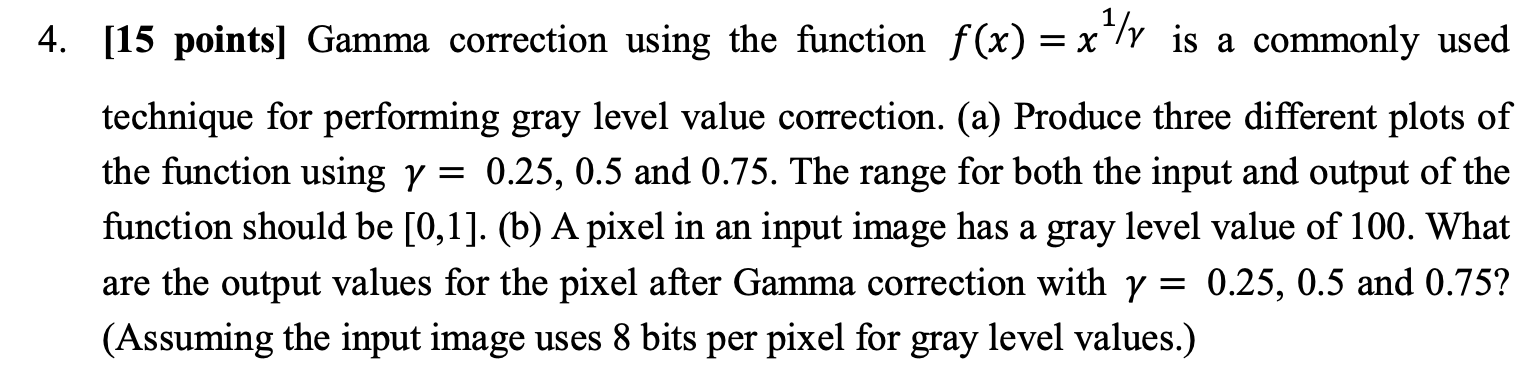

Solution to Question 4


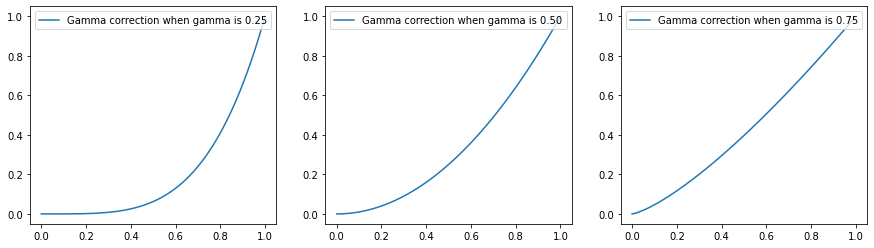

In [9]:
# Draw gamma correction
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)

fig = plt.figure(figsize=(15,4))

print("Solution to Question 4")

plt.subplot(1,3,1)
gamma = 0.25
plt.plot(x, np.power(x, 1 / gamma), label='Gamma correction when gamma is 0.25')
plt.legend(loc='upper left')

plt.subplot(1,3,2)
gamma = 0.5
plt.plot(x, np.power(x, 1 / gamma), label='Gamma correction when gamma is 0.50')
plt.legend(loc='upper left')

plt.subplot(1,3,3)
gamma = 0.75
plt.plot(x, np.power(x, 1 / gamma), label='Gamma correction when gamma is 0.75')
plt.legend(loc='upper left')


In [10]:
# Function to apply gamma correction to an image
def gamma_correction(image, gamma):
  image_down_scale = image / 255
  image_gamma_correction = np.power(image_down_scale, (1/gamma))
  output = image_gamma_correction * 255
  return output

In [11]:
image = 100
print("Solution to question 4(b)")
print("Pixel value 100 after gamma correction using gamma value 0.25 is \n", gamma_correction(image, 0.25))
print("Pixel value 100 after gamma correction using gamma value 0.50 is \n", gamma_correction(image, 0.5))
print("Pixel value 100 after gamma correction using gamma value 0.75 is \n", gamma_correction(image, 0.75))

Solution to question 4(b)
Pixel value 100 after gamma correction using gamma value 0.25 is 
 6.030862941101084
Pixel value 100 after gamma correction using gamma value 0.50 is 
 39.2156862745098
Pixel value 100 after gamma correction using gamma value 0.75 is 
 73.19587495200227


Solution to question 4(a)

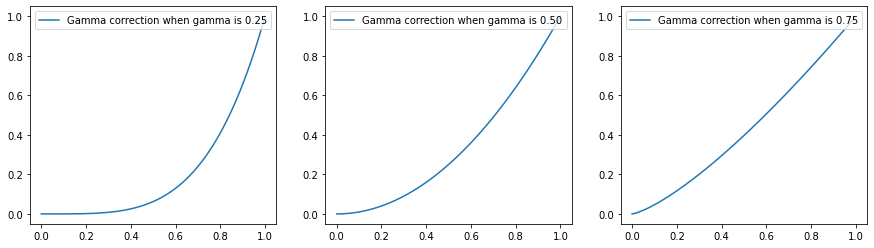

Solution to question 4(b)

Pixel value 100 after gamma correction using gamma value 0.25 is 6.030862941101084

Pixel value 100 after gamma correction using gamma value 0.50 is 39.2156862745098

Pixel value 100 after gamma correction using gamma value 0.75 is 73.19587495200227

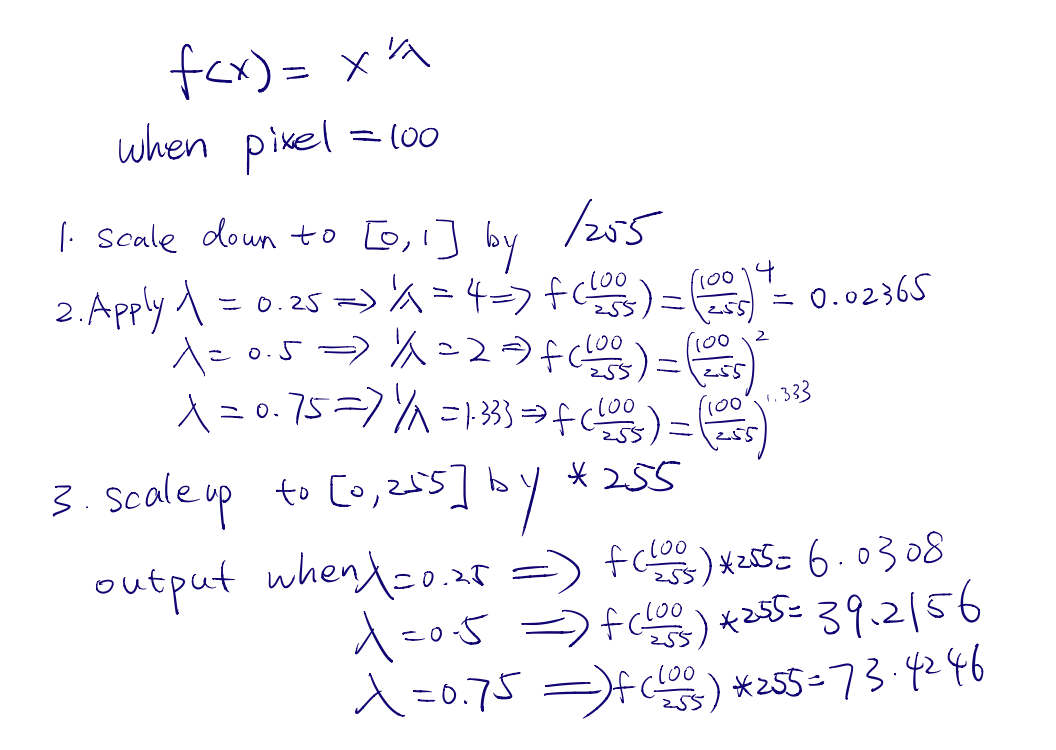

# Question 5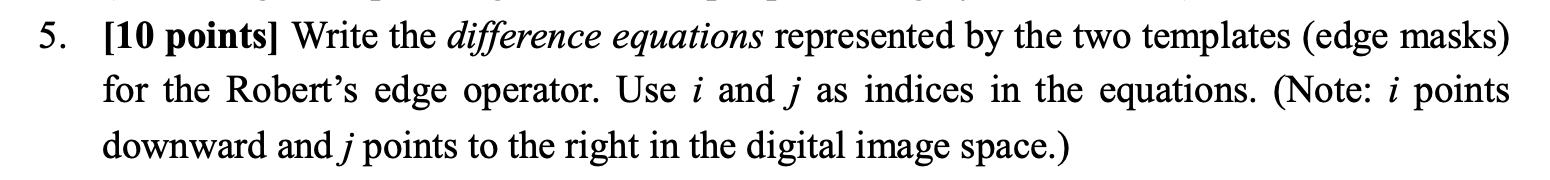

Solution to Question 5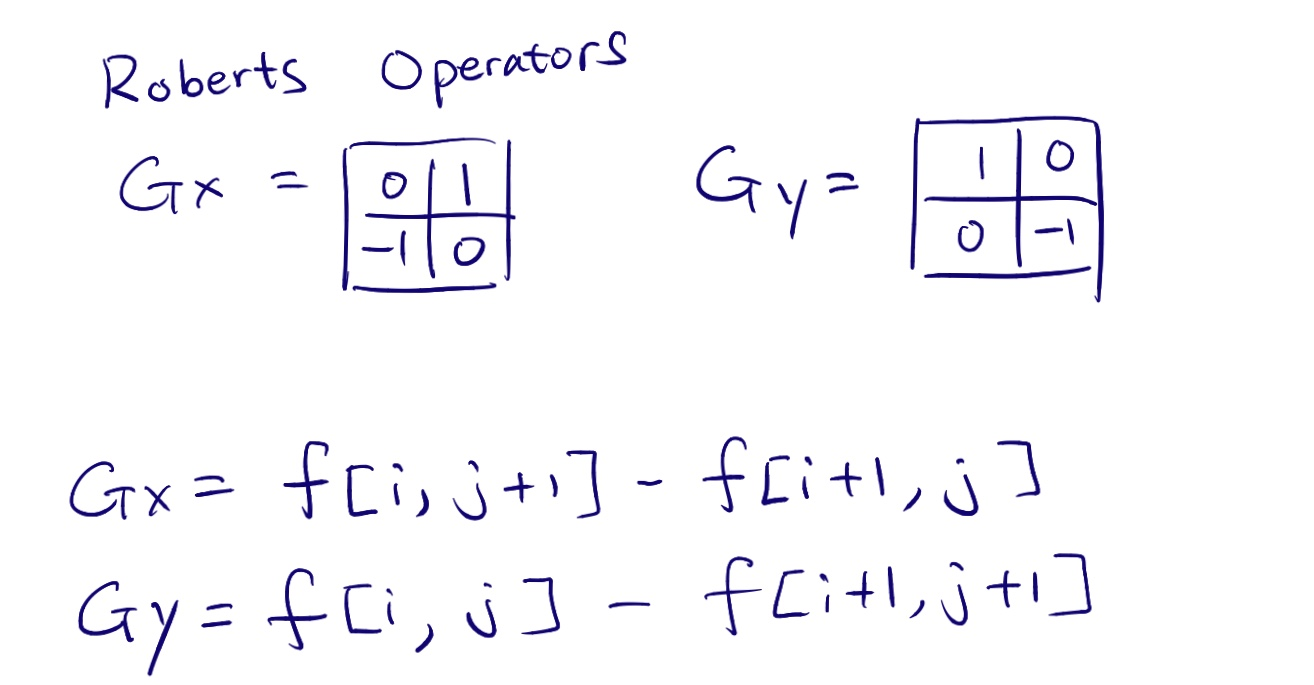

# Question 6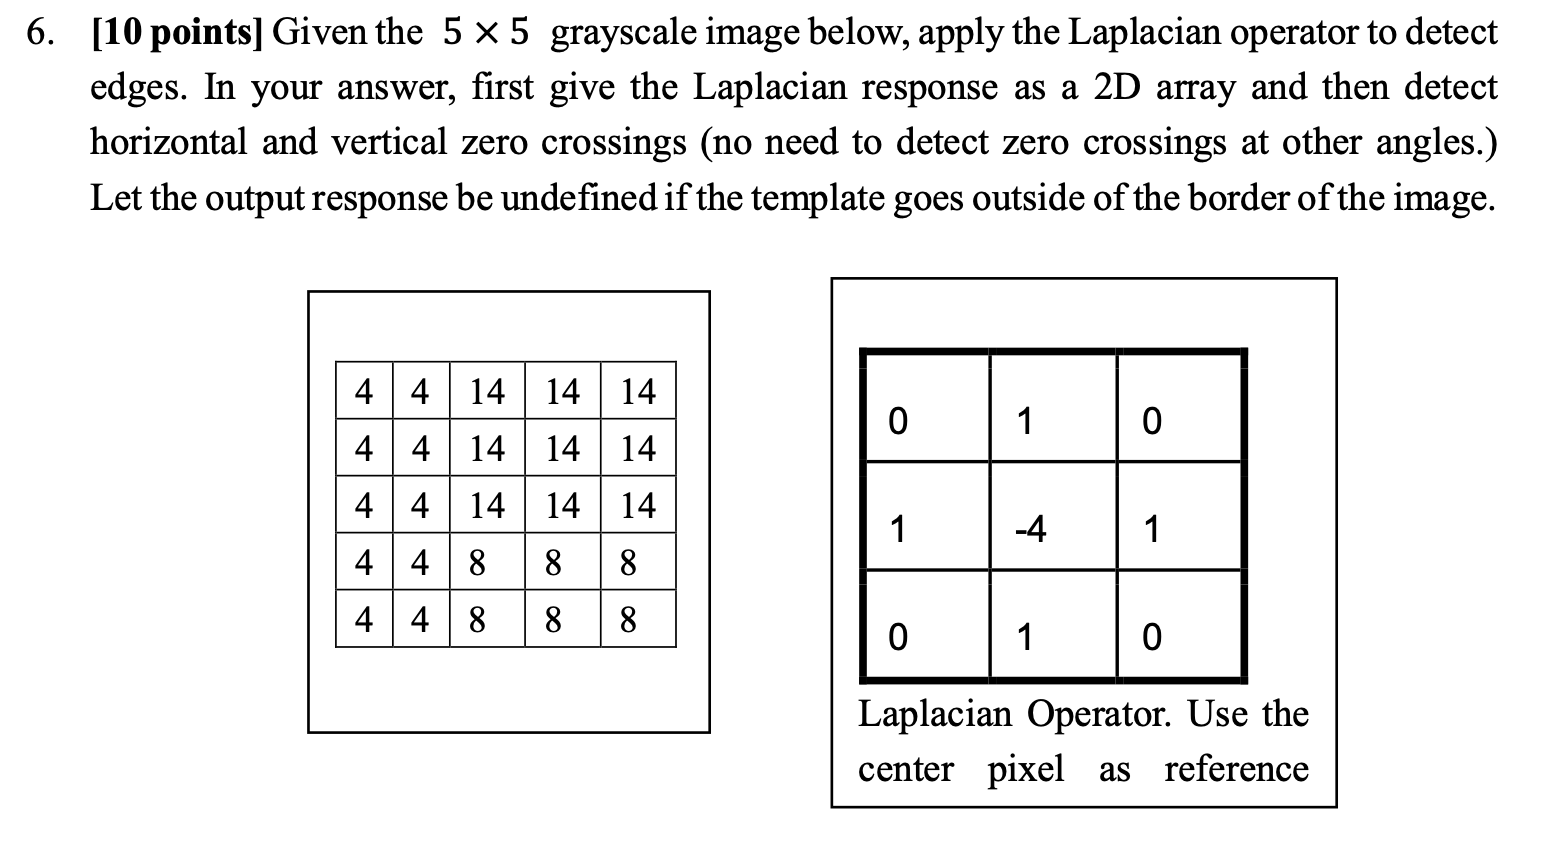

In [12]:
image = np.array([[4,4,14,14,14],[4,4,14,14,14],[4,4,14,14,14],[4,4,8,8,8],[4,4,8,8,8]])
laplacian_operator = np.array([[0,1,0],[1,-4,1],[0,1,0]])
print("Laplacian response matrix is\n" , convolution_2D(image, laplacian_operator))

Laplacian response matrix is
 [[ 10. -10.   0.]
 [ 10. -16.  -6.]
 [  4.   2.   6.]]


Solution to Question 6

Laplacian response

 [ 10. -10.   0.]

 [ 10. -16.  -6.]
 
 [  4.   2.   6.]

 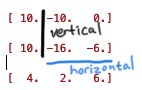

 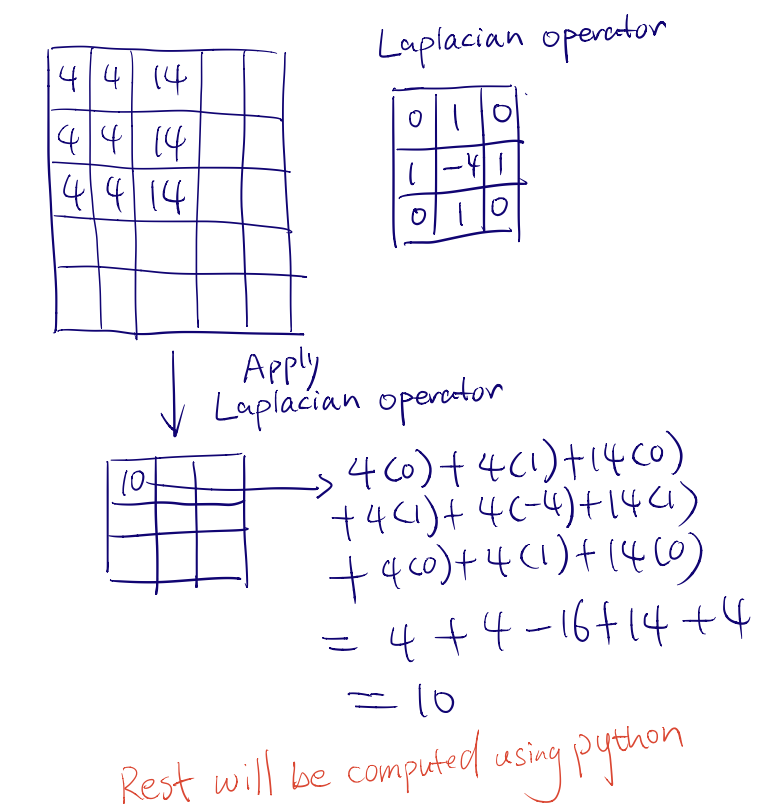

# Question 7
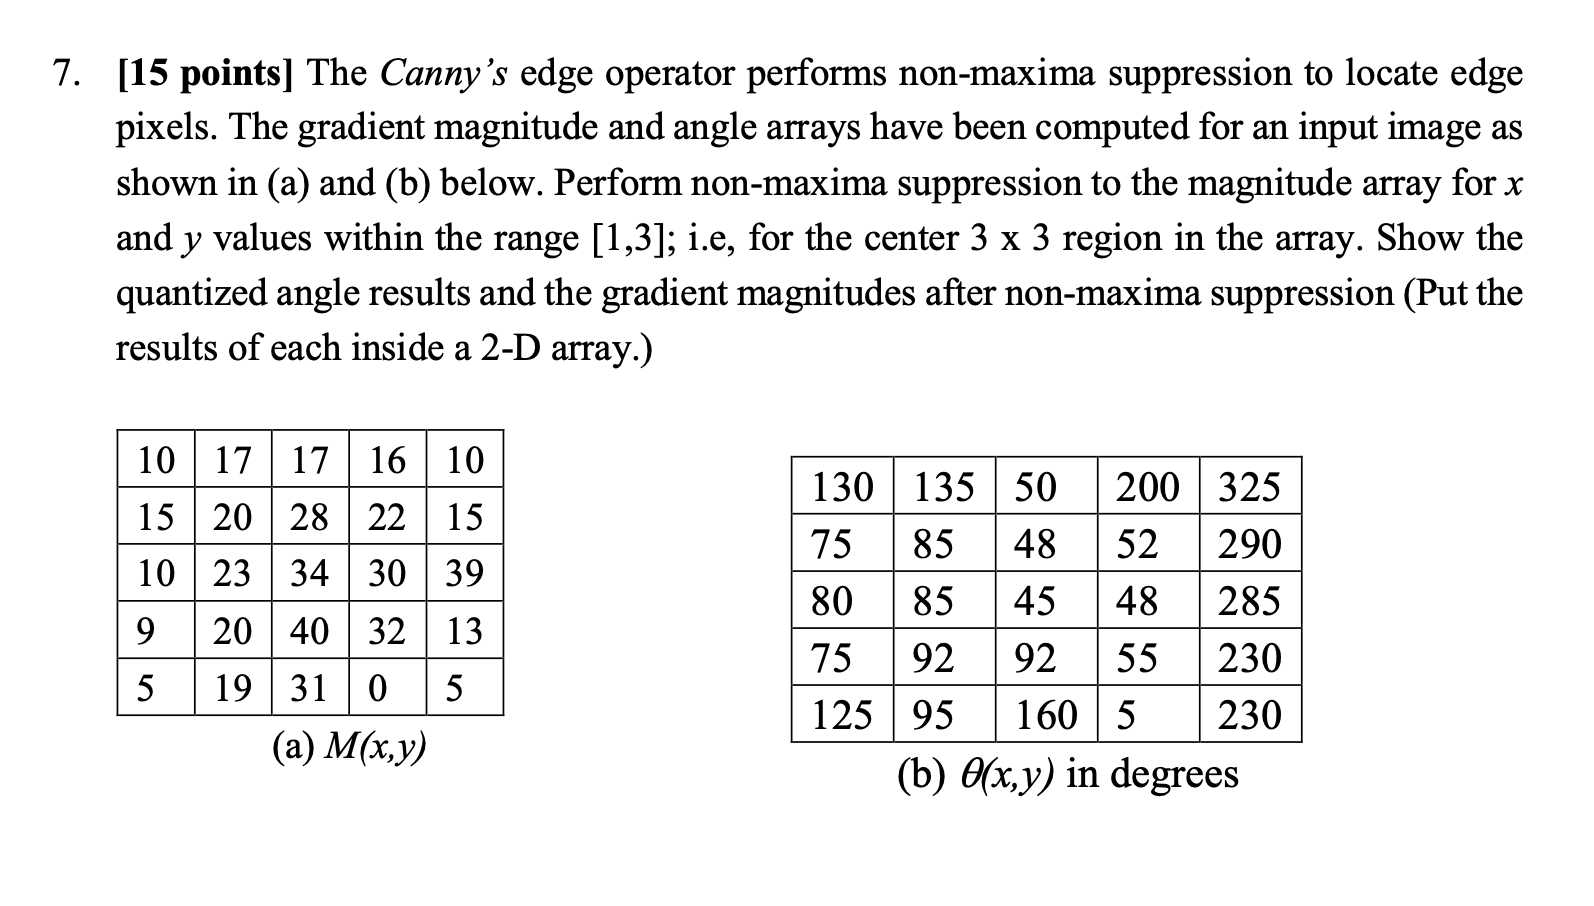

In [13]:
def quantize_angle(degrees):
  y, x = degrees.shape
  output = np.zeros((y, x))
  
  for i in range(y):
    for j in range(x):
      if degrees[i][j] >= 180:
        degrees[i][j] = degrees[i][j] - 180
      
      if degrees[i][j] < 22.5 or degrees[i][j] >= 157.5:
        output[i][j] = 0

      elif degrees[i][j] >= 22.5 and degrees[i][j] < 67.5:
        output[i][j] = 1

      elif degrees[i][j] >= 67.5 and degrees[i][j] < 112.5:
        output[i][j] = 2
      
      else:
        output[i][j] = 3
  return output

In [14]:
image_degrees = np.array([[130,135,50,200,325],[75,85,48,52,290],[80,85,45,48,285],[75,92,92,55,230],[125,95,160,5,230]])
quantized_angle = quantize_angle(image_degrees)
print("Quantized angleis\n",quantized_angle)

Quantized angleis
 [[3. 3. 1. 0. 3.]
 [2. 2. 1. 1. 2.]
 [2. 2. 1. 1. 2.]
 [2. 2. 2. 1. 1.]
 [3. 2. 0. 0. 1.]]


In [15]:
def gradient_magnitude(image_magnitude, quantized_angle):
  y, x = image_magnitude.shape
  output = np.zeros((y, x))

  for i in range(1, y - 1):
    for j in range(1, x - 1):
      if quantized_angle[i][j] == 0:
        if image_magnitude[i][j + 1] < image_magnitude[i][j] and image_magnitude[i][j - 1] < image_magnitude[i][j]:
          output[i][j] = image_magnitude[i][j] 
      elif quantized_angle[i][j] == 1:
        if image_magnitude[i - 1][j + 1] < image_magnitude[i][j] and image_magnitude[i + 1][j - 1] < image_magnitude[i][j]:
          output[i][j] = image_magnitude[i][j] 
      elif quantized_angle[i][j] == 2:
        if image_magnitude[i - 1][j] < image_magnitude[i][j] and image_magnitude[i + 1][j] < image_magnitude[i][j]:
          output[i][j] = image_magnitude[i][j] 
      else:
        if image_magnitude[i - 1][j - 1] < image_magnitude[i][j] and image_magnitude[i + 1][j + 1] < image_magnitude[i][j]:
          output[i][j] = image_magnitude[i][j] 
  return output

In [16]:
image_degrees = np.array([[130,135,50,200,325],[75,85,48,52,290],[80,85,45,48,285],[75,92,92,55,230],[125,95,160,5,230]])
quantized_angle = quantize_angle(image_degrees)
print(quantized_angle)
image_magnitude = np.array([[10,17,17,16,10],[15,20,28,22,15],[10,23,34,30,39],[9,20,40,32,13],[5,19,31,0,5]])
print("Gradient magnitude after non-maxima suppresion is\n", gradient_magnitude(image_magnitude, quantized_angle))

[[3. 3. 1. 0. 3.]
 [2. 2. 1. 1. 2.]
 [2. 2. 1. 1. 2.]
 [2. 2. 2. 1. 1.]
 [3. 2. 0. 0. 1.]]
Gradient magnitude after non-maxima suppresion is
 [[ 0.  0.  0.  0.  0.]
 [ 0.  0. 28.  0.  0.]
 [ 0. 23. 34.  0.  0.]
 [ 0.  0. 40.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


Solution to Question 7

Quantized angle is

 [3. 3. 1. 0. 3.]

 [2. ***2. 1. 1.*** 2.]

 [2. ***2. 1. 1.*** 2.]

 [2. ***2. 2. 1.*** 1.]

 [3. 2. 0. 0. 1.]

Gradient magnitude after non-maxima suppresion matrix is

 [ 0.  0.  0.  0.  0.]
 
 [ 0.  ***0. 28.  0.***  0.]
 
 [ 0. ***23. 34.  0.***  0.]
 
 [ 0.  ***0. 40.  0.***  0.]
 
 [ 0.  0.  0.  0.  0.]]

 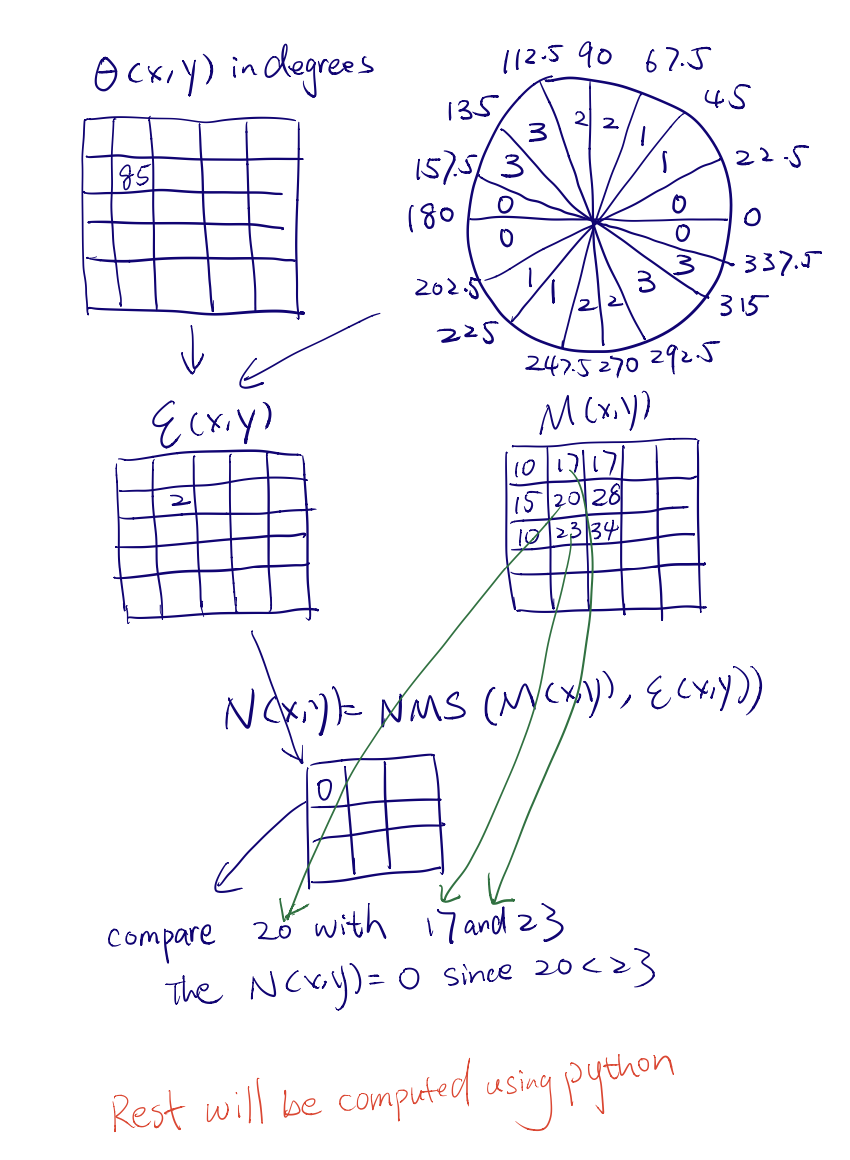